<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task" data-toc-modified-id="Task-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Goal" data-toc-modified-id="Goal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Features" data-toc-modified-id="Features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#Train/test-split" data-toc-modified-id="Train/test-split-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Train/test split</a></span></li></ul></li><li><span><a href="#Dummy-models" data-toc-modified-id="Dummy-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dummy models</a></span><ul class="toc-item"><li><span><a href="#Mean-value" data-toc-modified-id="Mean-value-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mean value</a></span></li><li><span><a href="#&quot;Nothing-changes&quot;" data-toc-modified-id="&quot;Nothing-changes&quot;-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>"Nothing changes"</a></span></li><li><span><a href="#Simple-tree" data-toc-modified-id="Simple-tree-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Simple tree</a></span></li><li><span><a href="#Look-at-your-data-using-your-own-eyes" data-toc-modified-id="Look-at-your-data-using-your-own-eyes-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Look at your data using your own eyes</a></span></li></ul></li><li><span><a href="#Ensembles" data-toc-modified-id="Ensembles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ensembles</a></span></li><li><span><a href="#Feature-engineering-for-tree-like-models" data-toc-modified-id="Feature-engineering-for-tree-like-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature engineering for tree-like models</a></span><ul class="toc-item"><li><span><a href="#Holidays" data-toc-modified-id="Holidays-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Holidays</a></span></li><li><span><a href="#Context" data-toc-modified-id="Context-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Context</a></span></li></ul></li><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature selection</a></span></li></ul></div>

In [1]:
!pip install sklearn_pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [3]:
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')
pio.templates.default = "plotly_white"

In [4]:
%config InlineBackend.figure_format = 'retina'

Seminar plan:
- Ensembles: how to overfit and how not to overfit
- Feature engineering for tree-based methods
- Feature selection (if you engineered too many features)

# Task

Source: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#

## Data

Hourly bike rentals in Seoul for 2 years

## Goal

Predict hourly bike rentals for 1 day ahead

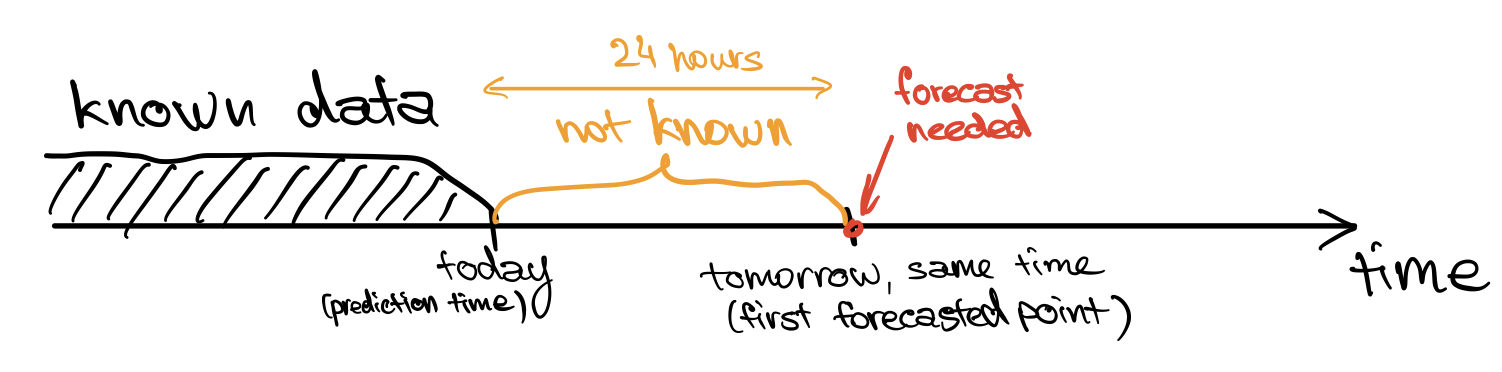

In [5]:
df = pd.read_csv('../data/SeoulBikeData.csv', encoding='latin1')
df['Date'] = pd.to_datetime(df['Date'])
df['Datetime'] = df.Date + pd.to_timedelta(df.Hour, unit='hours')
df.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
4676 2018-06-13               2276    20             22.1           65   
4111 2018-05-21               1135     7             12.3            0   
2453 2018-03-13                 97     5              6.8           56   
5804 2018-07-30               1947    20             33.9           46   
3142 2018-10-04                 75    22             15.8           83   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
4676               1.3              1611                       15.2   
4111               0.9              1989                       -2.7   
2453               0.9               570                       -1.3   
5804               1.4              2000                       20.6   
3142               5.4               691                       12.9   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
4676                     0.09           0.0            0.0  Summer   
4111                     0.48           0.0            0.0  Spring   
2453                     0.00           0.0            0.0  Spring   
5804                     0.03           0.0            0.0  Summer   
3142                     0.00           1.5            0.0  Spring   

         Holiday Functioning Day            Datetime  
4676  No Holiday             Yes 2018-06-13 20:00:00  
4111  No Holiday             Yes 2018-05-21 07:00:00  
2453  No Holiday             Yes 2018-03-13 05:00:00  
5804  No Holiday             Yes 2018-07-30 20:00:00  
3142  No Holiday             Yes 2018-10-04 22:00:00

In [6]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Datetime'],
      dtype='object')

In [7]:
fig = px.scatter(data_frame=df, x='Datetime', y='Rented Bike Count')
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="date"))

Actually we have data for 1 year only

## Features

**Discussion**: create features

In [8]:
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-01-12                254     0             -5.2           37   
1    2017-01-12                204     1             -5.5           38   
2    2017-01-12                173     2             -6.0           39   
3    2017-01-12                107     3             -6.2           40   
4    2017-01-12                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day            Datetime  
0     No Holiday             Yes 2017-01-12 00:00:00  
1     No Holiday             Yes 2017-01-12 01:00:00  
2     No Holiday             Yes 2017-01-12 02:00:00  
3     No Holiday             Yes 2017-01-12 03:00:00  
4     No Holiday             Yes 2017-01-12 04:00:00  
...          ...             ...                 ...  
8755  No Holiday             Yes 2018-11-30 19:00:00  
8756  No Holiday             Yes 2018-11-30 20:00:00  
8757  No Holiday             Yes 2018-11-30 21:00:00  
8758  No Holiday             Yes 2018-11-30 22:00:00  
8759  No Holiday             Yes 2018-11-30 23:00:00  

[8760 rows x 15 columns]

In [34]:
data_start = pd.to_datetime('2017-12-13')
features = df\
    .groupby('Hour')\
    .apply(lambda x: x.sort_values('Date').assign(
        target=lambda d: d['Rented Bike Count'].shift(-1),
    ))\
    .reset_index(drop=True)\
    .query('Date >= @data_start')\
    .sort_values(['Date', 'Hour'])\
    .dropna(axis='index', how='any')

In [35]:
features.loc[features.Hour == 10, ['Date', 'Hour', 'Rented Bike Count', 'target']][:4]

Date  Hour  Rented Bike Count  target
3662 2017-12-13    10                202   189.0
3663 2017-12-14    10                189   221.0
3664 2017-12-15    10                221   201.0
3665 2017-12-16    10                201   142.0

In [36]:
features.isna().any()

Date                         False
Rented Bike Count            False
Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
Datetime                     False
target                       False
dtype: bool

In [37]:
features.sample(4)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
5466 2018-12-03                603    14             14.9           34   
3919 2018-09-04                506    10              5.2           73   
7966 2018-10-07               1352    21             25.1           86   
8516 2018-04-04                668    23             10.2           58   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
5466               2.8               403                       -0.8   
3919               1.0               668                        0.7   
7966               0.3               870                       22.5   
8516               2.4              2000                        2.2   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
5466                     2.22           0.0            0.0  Spring   
3919                     2.08           0.0            0.0  Spring   
7966                     0.00           0.0            0.0  Summer   
8516                     0.00           0.0            0.0  Spring   

         Holiday Functioning Day            Datetime  target  
5466  No Holiday             Yes 2018-12-03 14:00:00   990.0  
3919  No Holiday             Yes 2018-09-04 10:00:00   954.0  
7966  No Holiday             Yes 2018-10-07 21:00:00  1641.0  
8516  No Holiday             Yes 2018-04-04 23:00:00   935.0

## Train/test split

In [15]:
features.Date.describe(datetime_is_numeric=True)

count                             8448
mean     2018-06-11 23:47:43.636369408
min                2017-12-13 00:00:00
25%                2018-03-13 18:00:00
50%                2018-06-12 00:00:00
75%                2018-09-10 06:00:00
max                2018-12-10 00:00:00
Name: Date, dtype: object

In [38]:
train = features.Date < pd.to_datetime('2018-09-11')
test = features.Date >= pd.to_datetime('2018-09-11')

In [39]:
X_train, X_test = features.loc[train, features.columns != 'target'], features.loc[test, features.columns != 'target']
y_train, y_test = features.loc[train, 'target'], features.loc[test, 'target']

# Dummy models

## Mean value

In [40]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean').fit(X_train, y_train)

In [41]:
dummy.predict(X_train)

array([697.67124369, 697.67124369, 697.67124369, ..., 697.67124369,
       697.67124369, 697.67124369])

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [43]:
mean_squared_error(y_true=y_train, y_pred=dummy.predict(X_train), squared=False)

657.1333050357559

In [44]:
mean_absolute_percentage_error(y_true=y_train, y_pred=dummy.predict(X_train))

7.488112767004248e+16

***Q***: why MAPE is that huge?

In [47]:
mean_absolute_percentage_error(y_true=y_train.clip(lower=1), y_pred=dummy.predict(X_train))

20.253329606302344

## "Nothing changes"

***Task***: evaluate the quality of the 'previous day' model

In [54]:
y_pred_train = X_train['Rented Bike Count']
print("RMSE: %.2f" % mean_squared_error(y_true=y_train, y_pred=y_pred_train, squared=False))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_true=y_train.clip(lower=1), y_pred=y_pred_train))

RMSE: 583.59
MAPE: 23.55


In [55]:
y_pred_test = X_test['Rented Bike Count']
print("RMSE: %.2f" % mean_squared_error(y_true=y_test, y_pred=y_pred_test, squared=False))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_true=y_test.clip(lower=1), y_pred=y_pred_test))

RMSE: 623.99
MAPE: 58.37


## Simple tree

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
dummy_tree = DecisionTreeRegressor(max_depth=3).fit(X=X_train[['Hour']], y=y_train)

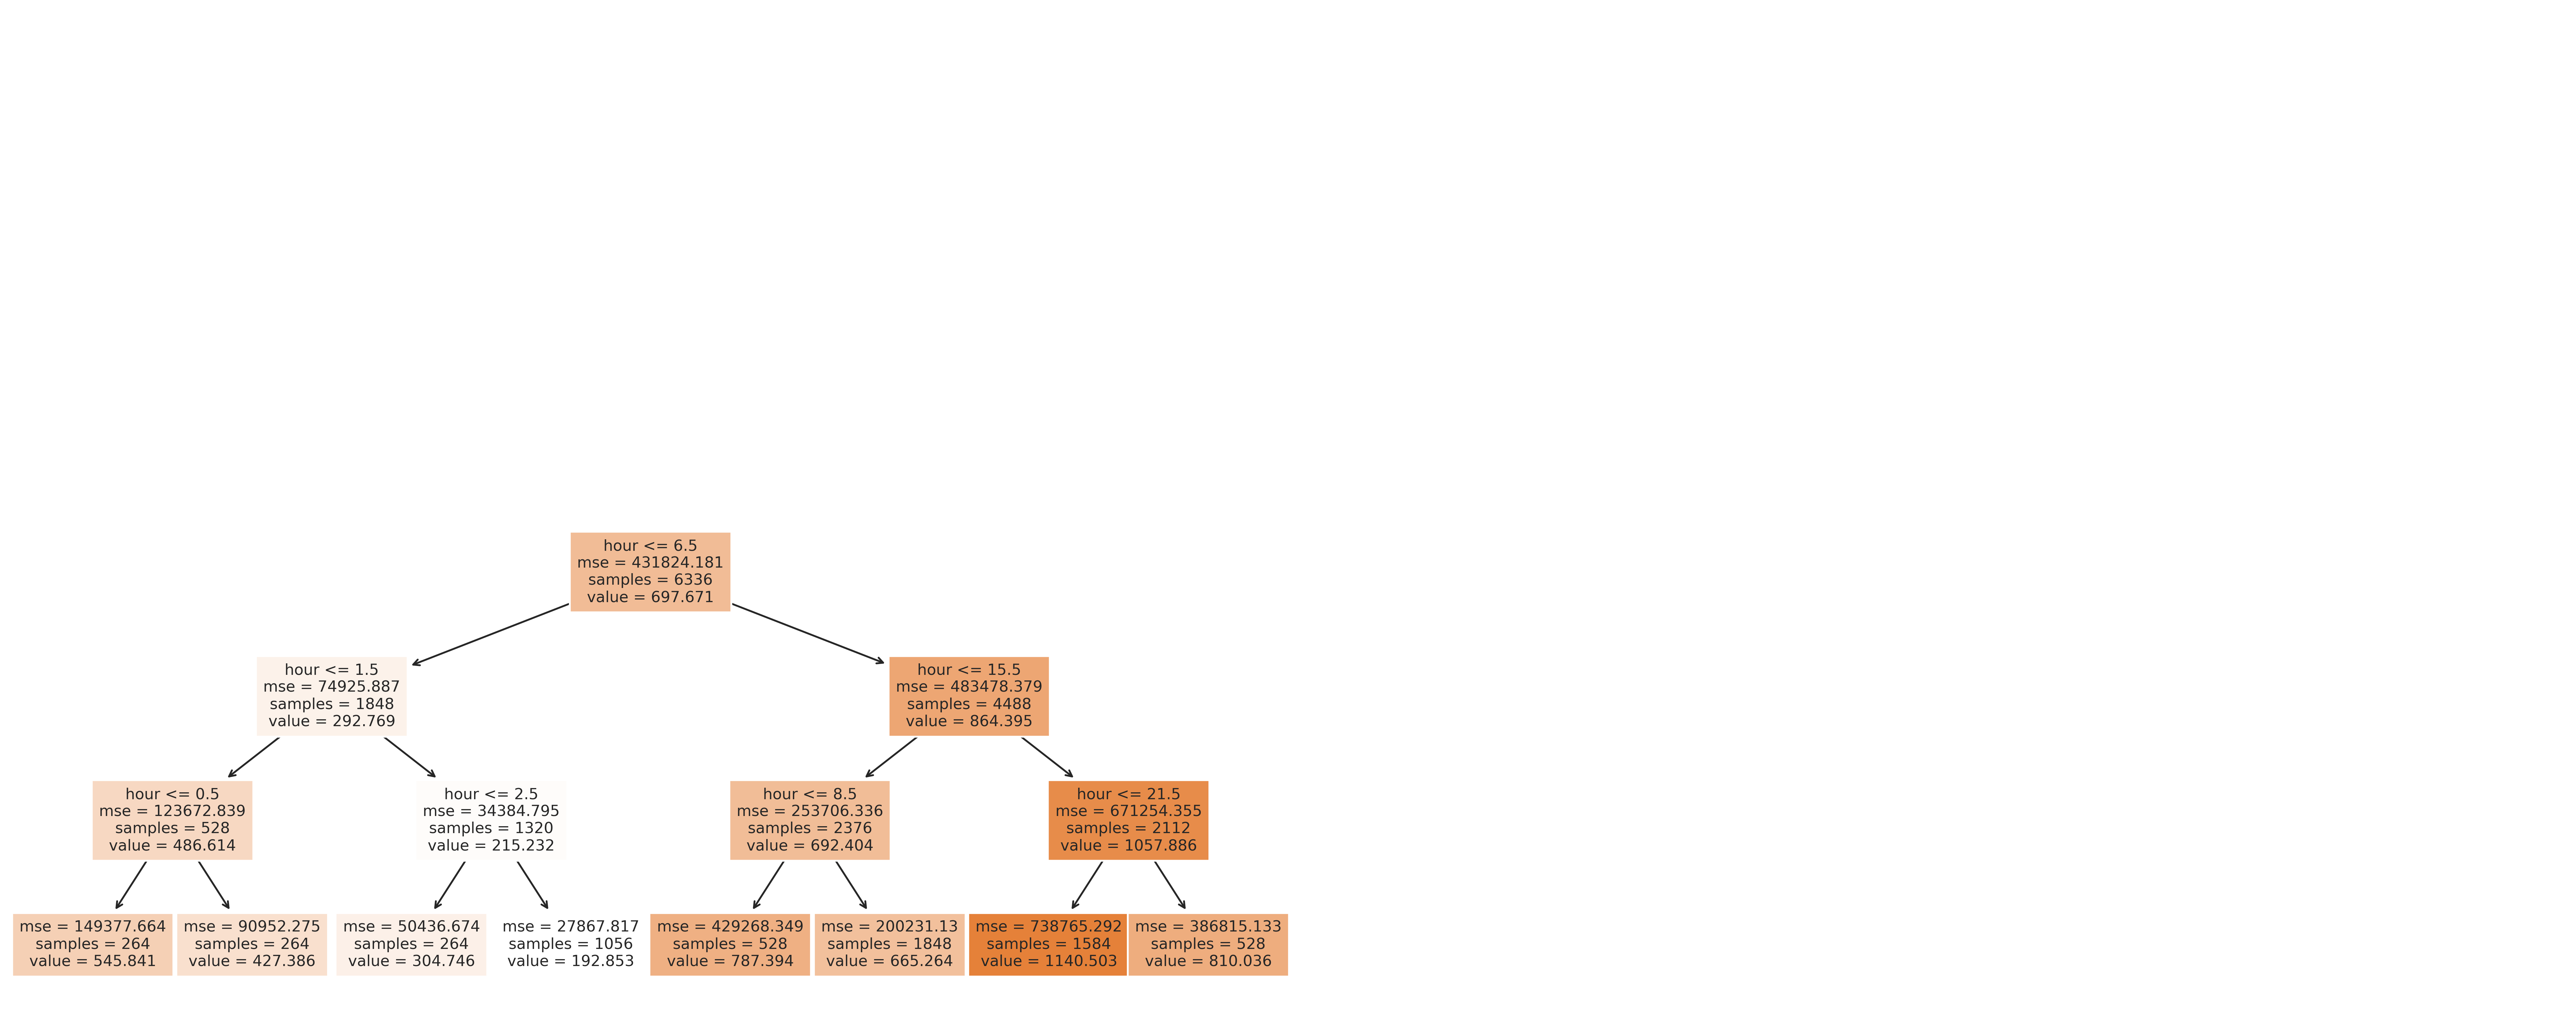

In [58]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25, 10), dpi=200)
plot_tree(dummy_tree, feature_names=['hour'], filled=True, ax=fig.gca(), fontsize='small');

In [59]:
dummy_tree.predict(X_train[['Hour']])

array([ 545.84090909,  427.38636364,  304.74621212, ..., 1140.50315657,
        810.03598485,  810.03598485])

In [60]:
y_pred_train = dummy_tree.predict(X_train[['Hour']])
print('Train RMSE %.2f' % mean_squared_error(y_true=y_train, y_pred=y_pred_train, squared=False))
print('Train MAPE %.2f%%' % mean_absolute_percentage_error(y_true=y_train.clip(lower=1), y_pred=y_pred_train))

Train RMSE 572.59
Train MAPE 18.96%


In [61]:
y_pred_test = dummy_tree.predict(X_test[['Hour']])
print('Test RMSE %.2f' % mean_squared_error(y_true=y_test, y_pred=y_pred_test, squared=False))
print('Test MAPE %.2f%%' % mean_absolute_percentage_error(y_true=y_test.clip(lower=1), y_pred=y_pred_test))

Test RMSE 522.02
Test MAPE 48.59%


## Look at your data using your own eyes

In [62]:
fig = go.Figure(data=[
    go.Scatter(x=X_train['Datetime'], y=y_train, name='ground truth'),
    go.Scatter(
        x=X_train['Datetime'], 
        y=dummy_tree.predict(X_train[['Hour']]),
        name='forecast',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty'
    ),
], layout=go.Layout(xaxis=dict(rangeslider=dict(visible=True), type="date")))
fig.show()

# Ensembles

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
X_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Datetime'],
      dtype='object')

In [101]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
rf = make_pipeline(
    ColumnTransformer([
        ('selector', 'passthrough', ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
                                     'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
                                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'
                                    ]),
        ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), ['Seasons', 'Holiday', 'Functioning Day'])
    ]), 
    RandomForestRegressor(n_estimators=100, max_depth=3)
).fit(X_train, y_train)

In [102]:
y_pred_train = rf.predict(X_train)

In [103]:
print('Train RMSE %.2f' % mean_squared_error(y_true=y_train, y_pred=y_pred_train, squared=False))
print('Train MAPE %.2f%%' % mean_absolute_percentage_error(y_true=y_train.clip(lower=1), y_pred=y_pred_train))

Train RMSE 459.79
Train MAPE 18.17%


In [104]:
y_pred_test = rf.predict(X_test)
print('Test RMSE %.2f' % mean_squared_error(y_true=y_test, y_pred=y_pred_test, squared=False))
print('Test MAPE %.2f%%' % mean_absolute_percentage_error(y_true=y_test.clip(lower=1), y_pred=y_pred_test))

Test RMSE 540.88
Test MAPE 49.10%


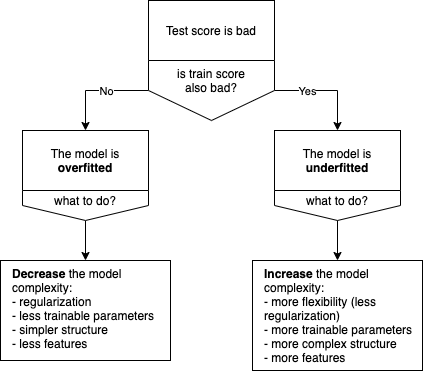

***Q***: what is the state of our model?

If you're curious, you can compare train and test behavior of the model:

In [107]:
fig = go.Figure(data=[
    go.Scatter(x=X_train['Datetime'], y=y_train, name='ground truth'),
    go.Scatter(
        x=X_train['Datetime'], 
        y=y_pred_train,
        name='forecast',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty'
    ),
], layout=go.Layout(xaxis=dict(rangeslider=dict(visible=True), type="date"), title='Train set'))
fig.show()

In [106]:
fig = go.Figure(data=[
    go.Scatter(x=X_test['Datetime'], y=y_test, name='ground truth'),
    go.Scatter(
        x=X_test['Datetime'], 
        y=y_pred_test,
        name='forecast',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty'
    ),
], layout=go.Layout(xaxis=dict(rangeslider=dict(visible=True), type="date")))
fig.show()

# Feature engineering for tree-like models

## Holidays

In [108]:
features = df\
    .groupby('Hour')\
    .apply(lambda x: x.sort_values('Date').assign(
        target=lambda d: d['Rented Bike Count'].shift(-1),
        target_season=lambda d: d['Seasons'].shift(-1),
        target_holiday=lambda d: d['Holiday'].shift(-1),
        target_func_day=lambda d: d['Functioning Day'].shift(-1),
    ))\
    .reset_index(drop=True)\
    .query('Date >= @data_start')\
    .sort_values(['Date', 'Hour'])\
    .dropna(axis='index', how='any')

In [109]:
X_train, X_test = features.loc[train, features.columns != 'target'], features.loc[test, features.columns != 'target']
y_train, y_test = features.loc[train, 'target'], features.loc[test, 'target']

In [110]:
X_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Datetime', 'target_season',
       'target_holiday', 'target_func_day'],
      dtype='object')

***Task***: add data about holidays to the model

In [117]:
rf = make_pipeline(
    ColumnTransformer([
        ('selector', 'passthrough', ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
                                     'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
                                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'
                                    ]),
        ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), 
         ['Seasons', 'Holiday', 'Functioning Day', 'target_season', 'target_holiday', 'target_func_day'])
    ]), 
    RandomForestRegressor(n_estimators=100, max_depth=25)
).fit(X_train, y_train)

In [118]:
y_pred_train = rf.predict(X_train)
print('Train RMSE %.2f' % mean_squared_error(y_true=y_train, y_pred=y_pred_train, squared=False))
print('Train MAPE %.2f%%' % mean_absolute_percentage_error(y_true=y_train.clip(lower=1), y_pred=y_pred_train))

Train RMSE 128.59
Train MAPE 0.81%


In [119]:
y_pred_test = rf.predict(X_test)
print('Test RMSE %.2f' % mean_squared_error(y_true=y_test, y_pred=y_pred_test, squared=False))
print('Test MAPE %.2f%%' % mean_absolute_percentage_error(y_true=y_test.clip(lower=1), y_pred=y_pred_test))

Test RMSE 400.63
Test MAPE 4.86%


Morale: holidays are important for time series data

## Context

In [122]:
features = df\
    .groupby('Hour')\
    .apply(lambda x: x.sort_values('Date').assign(
        target=lambda d: d['Rented Bike Count'].shift(-1),
        target_season=lambda d: d['Seasons'].shift(-1),
        target_holiday=lambda d: d['Holiday'].shift(-1),
        target_func_day=lambda d: d['Functioning Day'].shift(-1),
        target_yesterday=lambda d: d['Rented Bike Count'].shift(1),
        t_yesterday=lambda d: d['Temperature(°C)'].shift(1),
        humidity_yesterday=lambda d: d['Humidity(%)'].shift(1)
    ))\
    .reset_index(drop=True)\
    .query('Date >= @data_start')\
    .sort_values(['Date', 'Hour'])\
    .dropna(axis='index', how='any')\
    .assign(
        t_diff=lambda d: d['t_yesterday'] - d['Temperature(°C)'],
        target_change=lambda d: d['Rented Bike Count'] - d['target_yesterday']
)

In [123]:
X_train, X_test = features.loc[train, features.columns != 'target'], features.loc[test, features.columns != 'target']
y_train, y_test = features.loc[train, 'target'], features.loc[test, 'target']

In [127]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
rf = make_pipeline(
    ColumnTransformer([
        ('selector', 'passthrough', ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
                                     'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
                                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
                                     'target_yesterday', 't_yesterday', 'humidity_yesterday',
                                     't_diff', 'target_change'
                                    ]),
        ('onehotencoder', OneHotEncoder(handle_unknown='ignore'), ['Seasons', 'Holiday', 'Functioning Day',
                                                                   'target_season', 'target_holiday', 'target_func_day'
                                                                  ])
    ]), 
    RandomForestRegressor(n_estimators=300)
).fit(X_train, y_train)

In [128]:
y_pred_train = rf.predict(X_train)
print('Train RMSE %.2f' % mean_squared_error(y_true=y_train, y_pred=y_pred_train, squared=False))
print('Train MAPE %.2f%%' % mean_absolute_percentage_error(y_true=y_train.clip(lower=1), y_pred=y_pred_train))

Train RMSE 118.05
Train MAPE 0.90%


In [129]:
y_pred_test = rf.predict(X_test)
print('Test RMSE %.2f' % mean_squared_error(y_true=y_test, y_pred=y_pred_test, squared=False))
print('Test MAPE %.2f%%' % mean_absolute_percentage_error(y_true=y_test.clip(lower=1), y_pred=y_pred_test))

Test RMSE 390.14
Test MAPE 5.73%


***Q***: how to understand whether the change in metrics was not a random fluctuation?

# Feature selection

Main logic: "if the feature is not useful, then it can be removed"

In [20]:
from sklearn.model_selection import TimeSeriesSplit

In [21]:
tscv = TimeSeriesSplit(n_splits=5)

In [27]:
X_fselect = rf.named_steps['columntransformer'].transform(X_train)

In [28]:
X_fselect.shape

(6336, 29)

In [30]:
from sklearn.base import clone
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

results = []
for feature_id in tqdm(range(X_fselect.shape[1])):
    feature_errors = []
    X_for_feature = X_fselect.copy()
    X_for_feature[:, feature_id] = np.random.choice(X_for_feature[:, feature_id], size=len(X_for_feature))
    for train_index, test_index in tqdm(tscv.split(X_for_feature)):
        X_train_fselect, X_test_fselect = X_for_feature[train_index], X_for_feature[test_index]
        y_train_fselect, y_test_fselect = y_train.iloc[train_index], y_train.iloc[test_index]
        estimator = clone(rf.named_steps['randomforestregressor'])
        estimator.fit(X_train_fselect, y_train_fselect)
        y_test_pred_fselect = estimator.predict(X_test_fselect)
        feature_errors.append(dict(
            feature_id=feature_id, 
            rmse=mean_squared_error(y_test_fselect, y_test_pred_fselect, squared=False),
            mape=mean_absolute_percentage_error(y_test_fselect.clip(lower=1), y_test_pred_fselect)
        ))
    results.extend(feature_errors)

  0%|          | 0/29 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:04,  4.65s/it]
2it [00:12,  6.69s/it]
3it [00:25,  9.47s/it]
4it [00:43, 12.72s/it]
5it [01:05, 13.17s/it]
  3%|▎         | 1/29 [01:05<30:43, 65.84s/it]
0it [00:00, ?it/s]
1it [00:04,  4.59s/it]
2it [00:12,  6.77s/it]
3it [00:26,  9.81s/it]
4it [00:44, 13.25s/it]
5it [01:09, 13.85s/it]
  7%|▋         | 2/29 [02:15<30:32, 67.85s/it]
0it [00:00, ?it/s]
1it [00:04,  4.48s/it]
2it [00:12,  6.70s/it]
3it [00:25,  9.66s/it]
4it [00:43, 12.92s/it]
5it [01:07, 13.46s/it]
 10%|█         | 3/29 [03:22<29:17, 67.61s/it]
0it [00:00, ?it/s]
1it [00:04,  4.42s/it]
2it [00:12,  6.60s/it]
3it [00:25,  9.54s/it]
4it [00:43, 12.75s/it]
5it [01:06, 13.26s/it]
 14%|█▍        | 4/29 [04:28<27:57, 67.09s/it]
0it [00:00, ?it/s]
1it [00:04,  4.45s/it]
2it [00:12,  6.60s/it]
3it [00:25,  9.50s/it]
4it [00:43, 12.76s/it]
5it [01:06, 13.28s/it]
 17%|█▋        | 5/29 [05:35<26:44, 66.84s/it]
0it [00:00, ?it/s]
1it [00:04,  4.43s/it]
2it [00:12,  6

KeyboardInterrupt: 

In [130]:
px.scatter(data_frame=pd.DataFrame(results), x='feature_id', y='rmse')

In [131]:
px.scatter(data_frame=pd.DataFrame(results), x='feature_id', y='mape')